In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data3 = pd.read_csv("D:/regression_project/Cab-Weather Data/Cab_price_cleaned")
cab_price = data3.copy()

In [33]:
cab_price.head(1)

,distance_km,company,drop_location,pickup_location,price,surge,ride_type,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,month,weekday,weekend
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.46,0.29,1022.25,0.0,0.76,7.68,9,16,12,6,1


In [34]:
# Describe the data:
cab_price.describe()

,distance_km,price,surge,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,month,weekday,weekend
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,2.189261,16.545125,1.015068,39.222374,0.667874,1010.228828,0.005599,0.747333,6.91641,11.618528,17.797674,11.586550,2.781699,0.262076
std,1.135413,9.324359,0.095422,6.601370,0.313846,13.386430,0.026571,0.128962,3.64836,6.948776,9.982083,0.492452,2.056670,0.439764
min,0.020000,2.500000,1.000000,19.620000,0.000000,988.250000,0.000000,0.450000,0.30000,0.000000,1.000000,11.000000,0.000000,0.000000
25%,1.270000,9.000000,1.000000,36.110000,0.430000,999.950000,0.000000,0.650000,3.63000,6.000000,13.000000,11.000000,1.000000,0.000000
50%,2.160000,13.500000,1.000000,40.180000,0.760000,1009.550000,0.000000,0.730000,6.74000,12.000000,17.000000,12.000000,3.000000,0.000000
75%,2.930000,22.500000,1.000000,43.600000,0.960000,1021.880000,0.000000,0.870000,9.88000,18.000000,28.000000,12.000000,5.000000,1.000000
max,7.860000,97.500000,3.000000,55.410000,1.000000,1035.120000,0.274000,0.990000,18.18000,23.000000,30.000000,12.000000,6.000000,1.000000


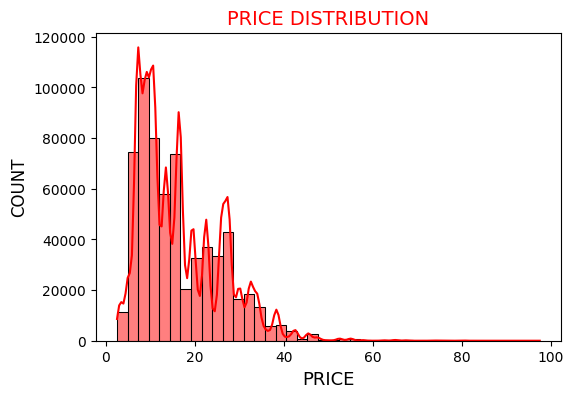

In [35]:
# See the price distribution:

plt.figure(figsize=(6,4))


sns.histplot(data=cab_price,x='price',color='red',
             bins=40,kde=True)
plt.title("PRICE DISTRIBUTION",fontsize = 14,color = 'red')
plt.xlabel("PRICE",fontsize = 13)
plt.ylabel("COUNT",fontsize = 12)
plt.show()

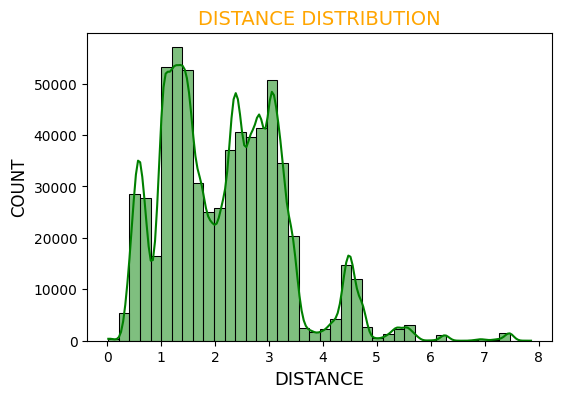

In [36]:
# See the distance distribution:

plt.figure(figsize=(6,4))


sns.histplot(cab_price['distance_km'],color='green',
             bins=40,kde=True)
plt.title("DISTANCE DISTRIBUTION",fontsize = 14,color = 'orange')
plt.xlabel("DISTANCE",fontsize = 13)
plt.ylabel("COUNT",fontsize = 12)
plt.show()


C:\Users\ahamm\AppData\Local\Temp\ipykernel_23796\4064952255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_location', data=cab_price, palette='Set1')


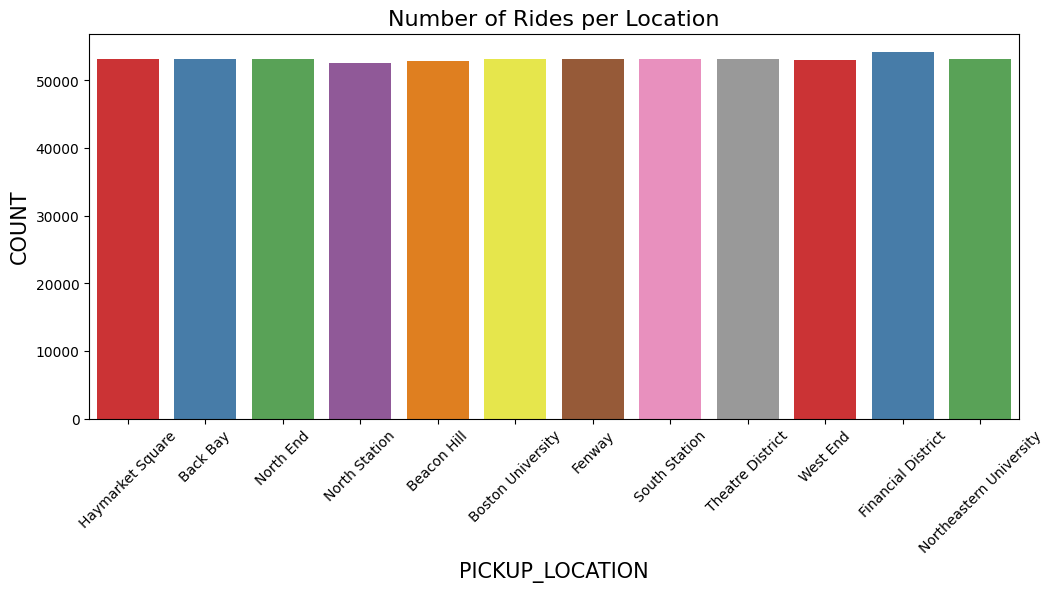

In [37]:
# See the distribution of the day:

plt.figure(figsize=(12,5))
sns.countplot(x='pickup_location', data=cab_price, palette='Set1')
plt.title("Number of Rides per Location", fontsize=16)
plt.ylabel("COUNT",fontsize = 15)
plt.xlabel("PICKUP_LOCATION",fontsize = 15)
plt.xticks(rotation=45)
plt.show()



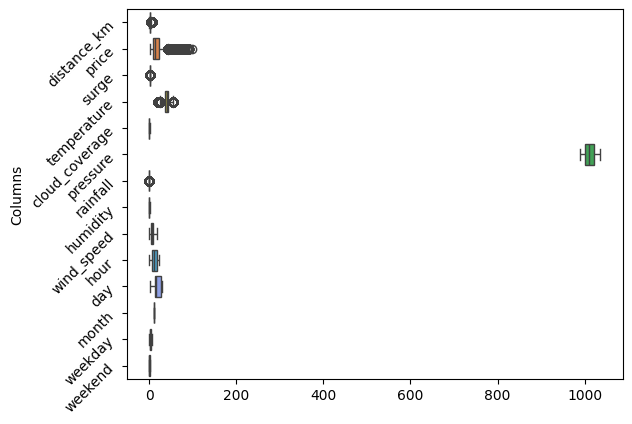

In [ ]:
# Detecting outliers:

cols = cab_price.select_dtypes(include=['number'])

# Boxplot:
sns.boxplot(data = cols,orient='h')
plt.ylabel("Columns")
plt.yticks(rotation = 45)
plt.show()

In [ ]:
# IQR Method:

outlier_summary = {}

for col in cols:
    Q1 = cab_price[col].quantile(0.25)
    Q3 = cab_price[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = cab_price[(cab_price[col] < lower) | (cab_price[col] > upper)][col].count()
    
    outlier_summary[col] = outliers

outlier_summary


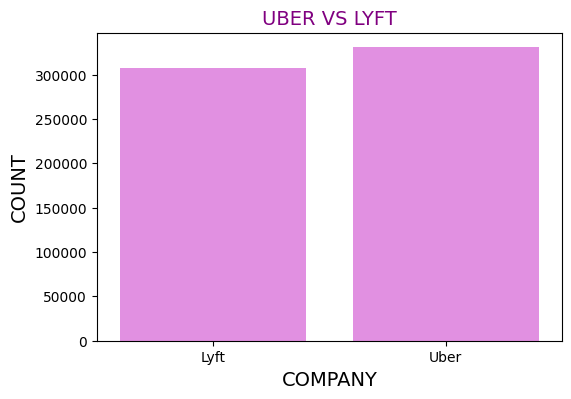

In [40]:
# Most repeated company:
plt.figure(figsize=(6,4))

sns.countplot(data = cab_price,x='company',color='violet')
plt.title("UBER VS LYFT",color = 'purple',fontsize = 14)
plt.xlabel("COMPANY",fontsize = 14)
plt.ylabel("COUNT",fontsize = 14)
plt.show()

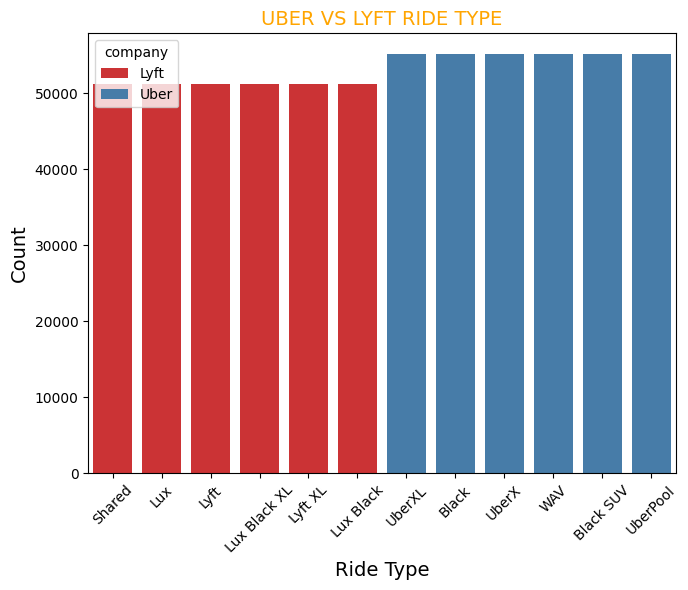

In [41]:
# Seeing most Prefered ride_type based on the company:
plt.figure(figsize=(7,6))

sns.countplot(data=cab_price,x='ride_type',hue='company',palette='Set1')
plt.title("UBER VS LYFT RIDE TYPE",color = 'orange',loc='center',fontsize = 14)
plt.xlabel("Ride Type",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left',title = 'company')
plt.tight_layout()
plt.show()

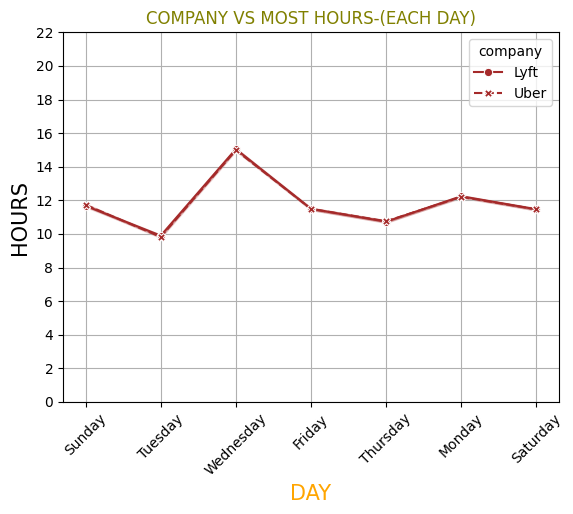

In [42]:
# DAILY HOURS OF USING COMPARING WITH COMPANIES:

cab_price['day'] = cab_price['weekday'].map({
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
})


sns.lineplot(
    data=cab_price,
    x='day',
    y='hour',
    style='company',
    linestyle='--',
    color='brown',
    markers=True,
)

plt.title("COMPANY VS MOST HOURS-(EACH DAY)",color = 'olive')
plt.xlabel("DAY",fontsize = 15,color = 'orange')
plt.ylabel("HOURS",fontsize = 15)
plt.xticks(rotation = 45)
plt.yticks(range(0,24,2))
plt.grid()
plt.show()


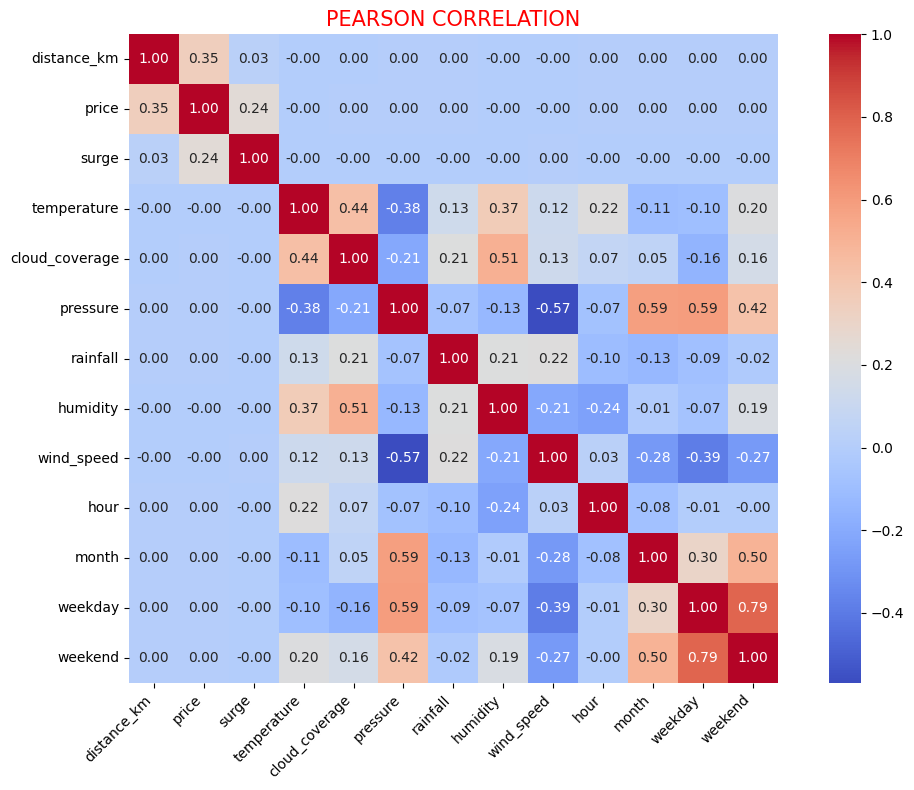

In [43]:
# Correlation:
c_cols = cab_price.select_dtypes(include='number')

# Pearson method:
cor = c_cols.corr(method='pearson')

plt.figure(figsize=(11,8))

sns.heatmap(cor,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar=True,
            square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("PEARSON CORRELATION",fontsize =15,color= 'red')
plt.tight_layout() 
plt.show()


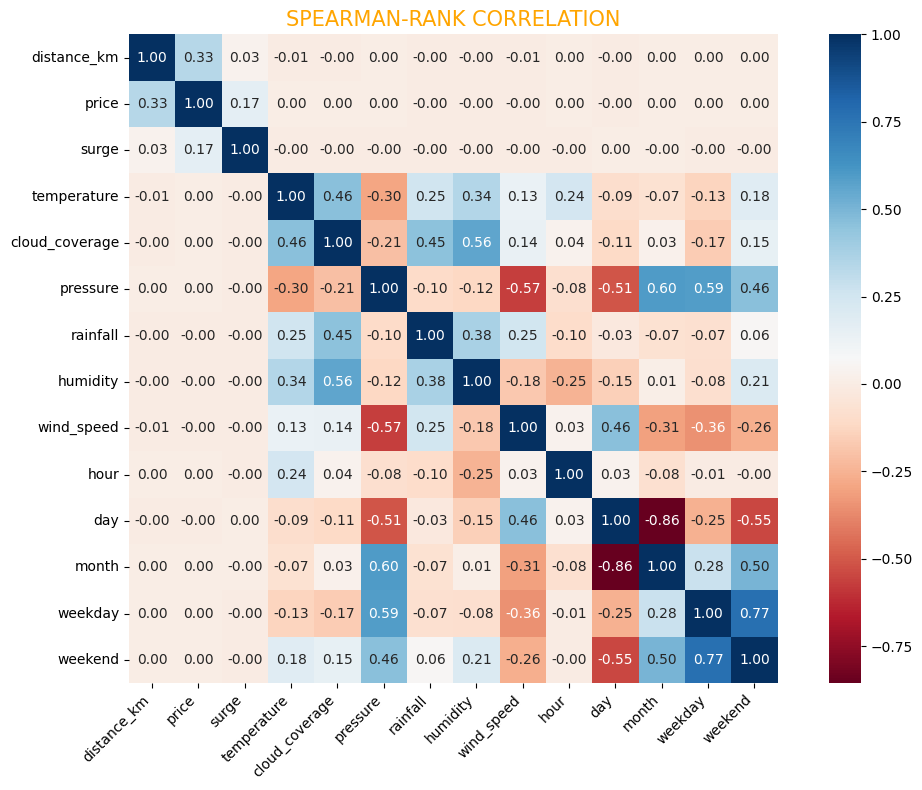

In [44]:
# Spearsman correlation:
cor1 = cols.corr(method='spearman')

plt.figure(figsize=(11,8))

sns.heatmap(cor1,
            annot=True,
            cmap='RdBu',
            fmt=".2f",
            cbar=True,
            square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("SPEARMAN-RANK CORRELATION",fontsize =15,color= 'orange')

plt.tight_layout() 
plt.show()


In [45]:
# Multi-Colliniratiy:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns
c_cols = cab_price.select_dtypes(include='number')

# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = c_cols.columns
vif_data["VIF"] = [variance_inflation_factor(c_cols.values, i)
                   for i in range(len(c_cols.columns))]

print(vif_data)


           feature          VIF
0      distance_km     5.375155
1            price     5.013854
2            surge   120.806620
3      temperature    57.888324
4   cloud_coverage     9.647621
5         pressure  1867.853815
6         rainfall     1.208066
7         humidity    71.733167
8       wind_speed     6.664820
9             hour     4.856880
10           month  1302.535599
11         weekday    15.243574
12         weekend     8.127847


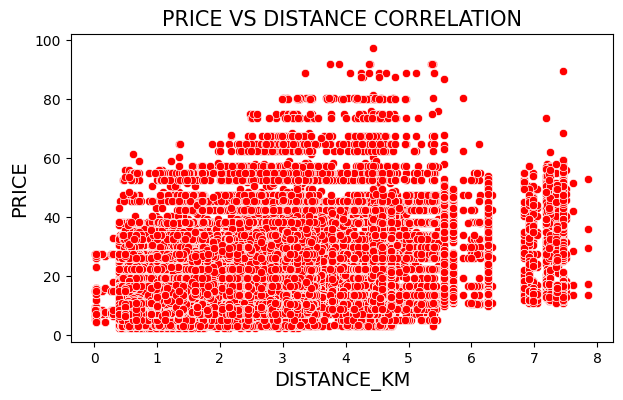

In [46]:
# Seeing scatter plot :

plt.figure(figsize=(7,4))

sns.scatterplot(data=cab_price,x='distance_km',y='price',color = 'red')
plt.title("PRICE VS DISTANCE CORRELATION",fontsize = 15)
plt.xlabel("DISTANCE_KM",fontsize = 14)
plt.ylabel("PRICE",fontsize = 14)
plt.show()

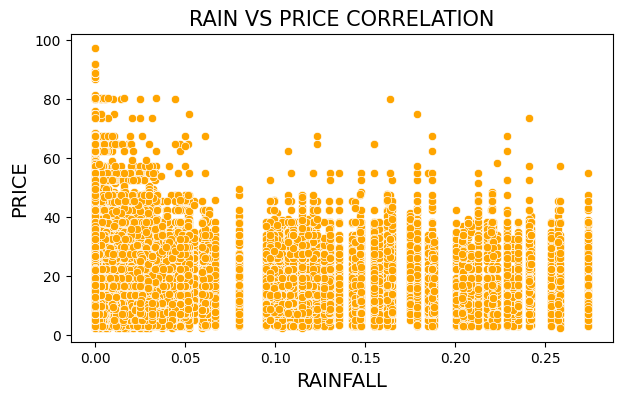

In [47]:
# Seeing scatter plot :

plt.figure(figsize=(7,4))

sns.scatterplot(data=cab_price,x='rainfall',y='price',color = 'orange')
plt.title("RAIN VS PRICE CORRELATION",fontsize = 15)
plt.xlabel("RAINFALL",fontsize = 14)
plt.ylabel("PRICE",fontsize = 14)
plt.show()

In [48]:
# Skewness checking:
c_cols.skew()

distance_km       0.816848
price             1.045747
surge             7.969048
temperature      -0.616653
cloud_coverage   -0.610810
pressure          0.146789
rainfall          6.726908
humidity         -0.068071
wind_speed        0.286033
hour             -0.045743
month            -0.351508
weekday           0.129895
weekend           1.082058
dtype: float64